In [1]:
using Pkg
# Pkg.add("Profile")
# Pkg.instantiate()

In [2]:
using DelimitedFiles
using LinearAlgebra
using Optim
using Distributions
using Test
using BenchmarkTools
using Random
using CSV
using DataFrames
using Plots
using Profile

In [26]:
X = rand(MersenneTwister(0), 20, 20);
M = X'X;

In [33]:
loops_vecs = eigen(M).vectors;

for i in 2:10
    loops_vecs = hcat(loops_vecs, eigen(M).vectors)
end


In [19]:
using Distributed

In [20]:
# addprocs(5);

In [21]:
procs()

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [28]:
@everywhere begin
    
    using LinearAlgebra
    using Random
    
    X = rand(MersenneTwister(0), 20, 20);
    M = X'X
    
end

In [29]:
dist_loops_vecs = @distributed (hcat) for i in 1:10
    
    eigen(M).vectors
    
end
    

20×200 Matrix{Float64}:
 -0.0353771  -0.0958316  -0.0236553  …   0.473661    0.309426    -0.227359
 -0.203822   -0.20792    -0.172318       0.109282    0.196374    -0.199787
 -0.201056    0.353816   -0.0420359      0.263805    0.013552    -0.23134
  0.202497    0.421428    0.30386       -0.0807621  -0.187058    -0.227973
 -0.425513   -0.233271    0.279336       0.0888074  -0.4666      -0.246013
  0.249638    0.295531    0.0851028  …   0.0995804   0.103077    -0.212813
 -0.11484    -0.0480769  -0.325159       0.223512   -0.42657     -0.231725
  0.247492   -0.386301   -0.0332637     -0.198539   -0.0262969   -0.229437
  0.0789209   0.121699    0.0319043     -0.0422994   0.0685429   -0.18503
 -0.18261    -0.151134    0.482018      -0.0853335   0.3917      -0.24011
 -0.170565    0.152831    0.285017   …   0.117568   -0.0573637   -0.264104
 -0.150028   -0.134997   -0.076598      -0.204851    0.268046    -0.233493
  0.380867    0.0955223  -0.0363359      0.0479955  -0.0978179   -0.154466
  0.

In [34]:
loops_vecs

20×200 Matrix{Float64}:
  0.0353771  -0.0958316  -0.0236553  …   0.473661    0.309426    -0.227359
  0.203822   -0.20792    -0.172318       0.109282    0.196374    -0.199787
  0.201056    0.353816   -0.0420359      0.263805    0.013552    -0.23134
 -0.202497    0.421428    0.30386       -0.0807621  -0.187058    -0.227973
  0.425513   -0.233271    0.279336       0.0888074  -0.4666      -0.246013
 -0.249638    0.295531    0.0851028  …   0.0995804   0.103077    -0.212813
  0.11484    -0.0480769  -0.325159       0.223512   -0.42657     -0.231725
 -0.247492   -0.386301   -0.0332637     -0.198539   -0.0262969   -0.229437
 -0.0789209   0.121699    0.0319043     -0.0422994   0.0685429   -0.18503
  0.18261    -0.151134    0.482018      -0.0853335   0.3917      -0.24011
  0.170565    0.152831    0.285017   …   0.117568   -0.0573637   -0.264104
  0.150028   -0.134997   -0.076598      -0.204851    0.268046    -0.233493
 -0.380867    0.0955223  -0.0363359      0.0479955  -0.0978179   -0.154466
 -0.

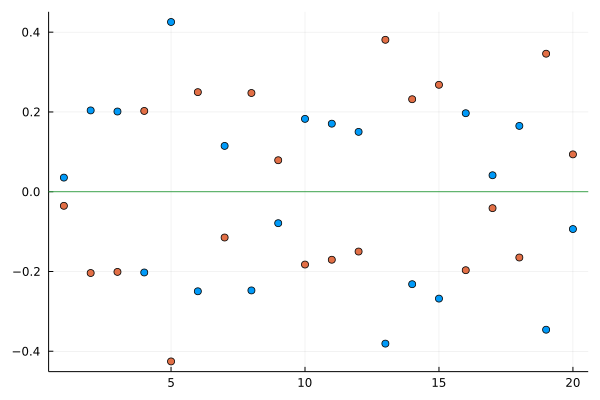

In [68]:
col = 1

scatter(loops_vecs[:, col])
scatter!(dist_loops_vecs[:, col], legend = false)
hline!([0])